#KMeans++


## Carregando Base de Dados

In [1]:
!rm -r MLUD
!git clone https://github.com/Crissky/MLUD.git

Cloning into 'MLUD'...
remote: Enumerating objects: 384, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (363/363), done.
remote: Total 384 (delta 171), reused 63 (delta 6), pack-reused 0
Receiving objects: 100% (384/384), 6.12 MiB | 11.05 MiB/s, done.
Resolving deltas: 100% (171/171), done.


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

## Função Auxiliar

In [3]:
def fillMissingData(X, strategy='median'):
    imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
    _, total_columns = X.shape
    
    for index_column in range(total_columns):
        if(pd.isnull(X[:, index_column:index_column+1]).any()):
            X[:, index_column:index_column+1] = imputer.fit_transform(X[:, index_column:index_column+1])
        
    return X

## Carregando Conjunto de Dados

In [4]:
df = pd.read_csv('MLUD/Aula21/svbr.csv', delimiter=';')

df.head(30)

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0
6,Delta T - Os super lentos,12000.0,171361.0
7,Bláblálogia,161951.0,11027386.0
8,Efarsas,78876.0,6226235.0
9,Minuto da Terra,274196.0,30166457.0


## Pré-processamento

In [5]:
#Pré-processamento
df_numpy = fillMissingData(df.to_numpy())
df_numpy[:, 1] = df_numpy[:, 1].astype('int')
df_numpy[:, 2] = df_numpy[:, 2].astype('int')

#Atualizando Peixe Babel
df.at[28, 'Inscritos'] = df_numpy[28][1]
df.at[28, 'Visualizações'] = df_numpy[28][2]

#Converte Inscritos e Visualizações para inteiro
df.Inscritos = df.Inscritos.astype('int')
df.Visualizações = df.Visualizações.astype('int')

X = pd.DataFrame({'Inscritos': df_numpy[:, 1], 'Visualizações':df_numpy[:,2]})
X.head()

,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


## Método do Cotovelo

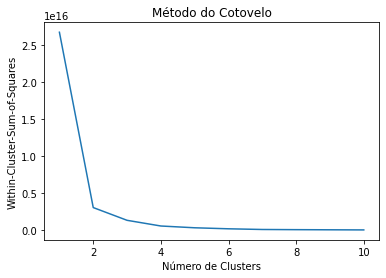

In [6]:
wcss = list()

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

## K = 2

In [7]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans.fit_predict(X)

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [8]:
df['Cluster'] = clusters

df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [9]:
boolArray = df['Cluster'] == 0

df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0
6,Delta T - Os super lentos,12000,171361,0
7,Bláblálogia,161951,11027386,0
8,Efarsas,78876,6226235,0
9,Minuto da Terra,274196,30166457,0


In [10]:
boolArray = df['Cluster'] == 1

df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


### Gráfico

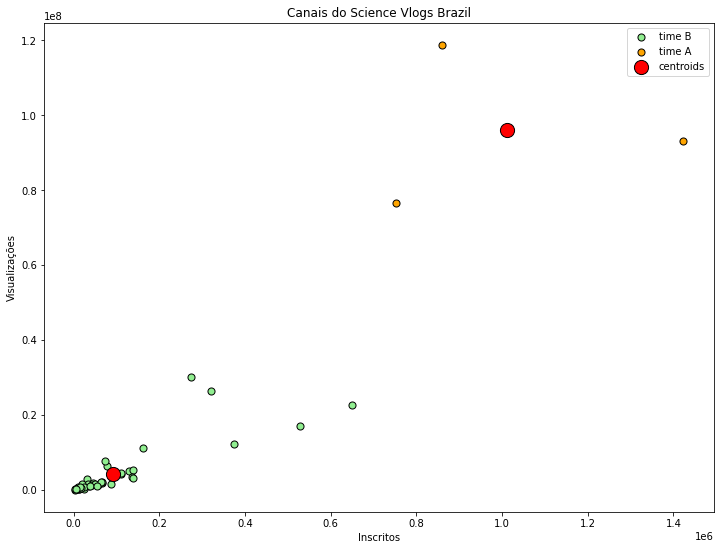

In [11]:
x = X.to_numpy()

plt.figure(figsize=(12,9))
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            label='time B'
            )

plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1],
            s=50, c='orange',
            edgecolor='black',
            label='time A'
            )

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', edgecolor='black', label='centroids')

plt.title("Canais do Science Vlogs Brazil")
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()

## K = 3

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans.fit_predict(X)

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [13]:
df['Cluster'] = clusters

df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [14]:
boolArray = df['Cluster'] == 0

df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0
6,Delta T - Os super lentos,12000,171361,0
7,Bláblálogia,161951,11027386,0
8,Efarsas,78876,6226235,0
10,Canal Cura Quântica,13148,250020,0


In [15]:
boolArray = df['Cluster'] == 1

df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


In [16]:
boolArray = df['Cluster'] == 2

df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
9,Minuto da Terra,274196,30166457,2
23,Minutos Psíquicos,648892,22555134,2
29,SpaceToday,321068,26277335,2
30,Ciência todo dia,528761,16969332,2


### Gráfico

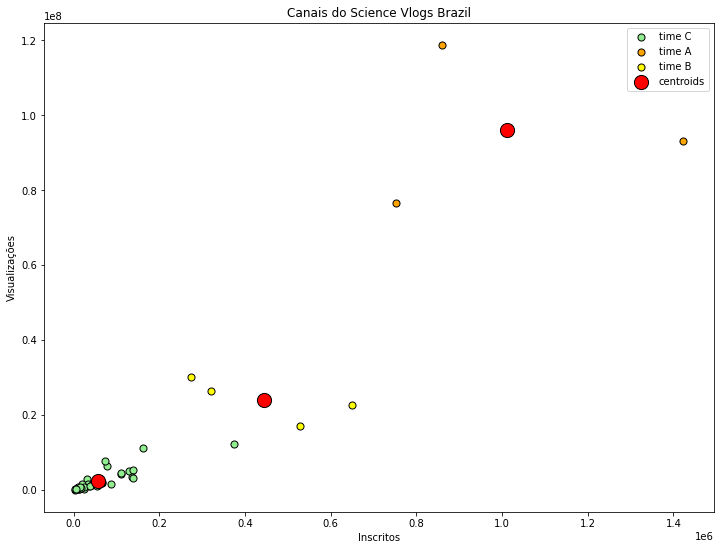

In [17]:
x = X.to_numpy()

plt.figure(figsize=(12,9))
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            label='time C'
            )

plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1],
            s=50, c='orange',
            edgecolor='black',
            label='time A'
            )

plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1],
            s=50, c='yellow',
            edgecolor='black',
            label='time B'
            )

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', edgecolor='black', label='centroids')

plt.title("Canais do Science Vlogs Brazil")
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()

# Clusterização Hierárquica


## Imports

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## Dendrograma

### Single

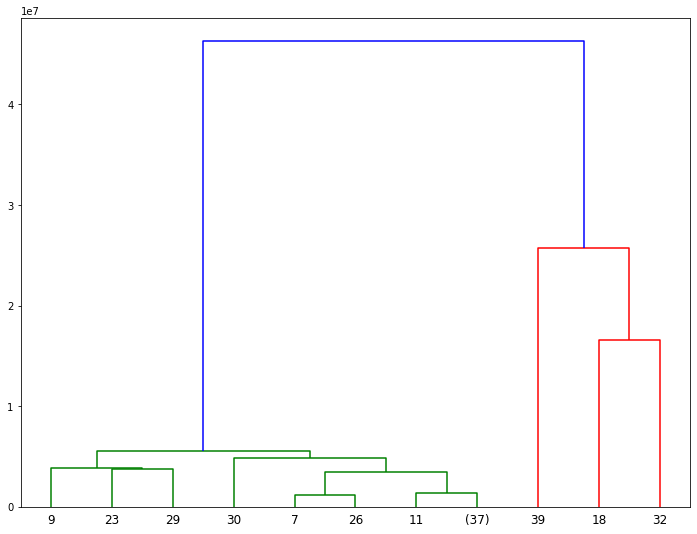

In [19]:
plt.figure(figsize=(12,9))

#linkage tsem parâmentros é igual ao single
dendrogram(linkage(x), truncate_mode='level', p=4)

plt.show()

### Ward

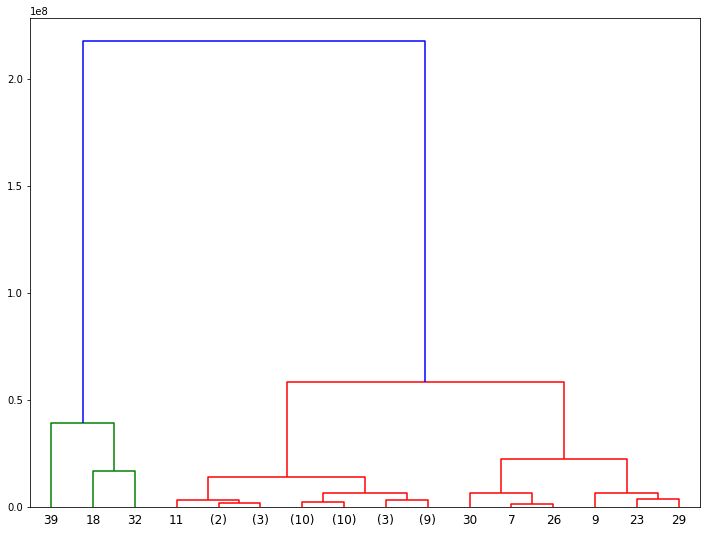

In [20]:
plt.figure(figsize=(12,9))

dendrogram(linkage(x, 'ward'), truncate_mode='level', p=4)

plt.show()

## Algoritmo de Clusterização Hierárquica

In [21]:
model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusters = model.fit_predict(x)

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [22]:
df['Cluster_Hier'] = clusters

df.head()

,Canal,Inscritos,Visualizações,Cluster,Cluster_Hier
0,Site Arqueologia Egípcia,13438,406590,0,0
1,Terra Negra,35241,868235,0,0
2,Frank Jaava,31680,2856508,0,0
3,Dispersciência,25100,150000,0,0
4,Olá Ciência,32788,1575456,0,0


### Gráfico

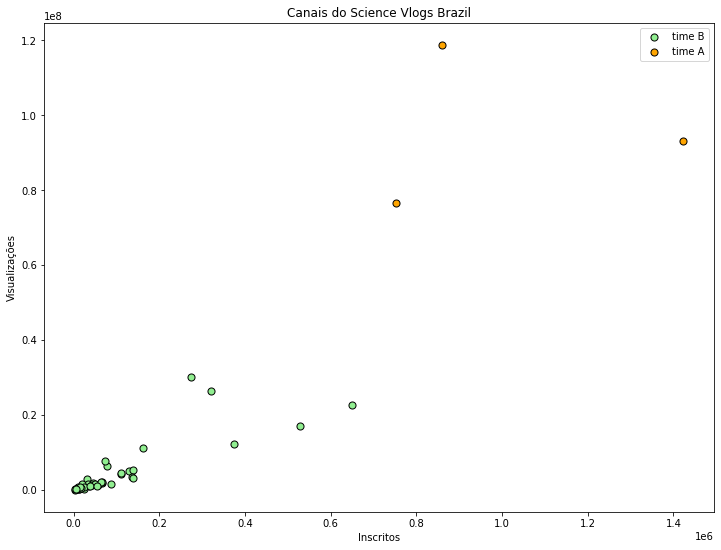

In [23]:
x = X.to_numpy()

plt.figure(figsize=(12,9))
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1],
            s=50, c='lightgreen',
            edgecolor='black',
            label='time B'
            )

plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1],
            s=50, c='orange',
            edgecolor='black',
            label='time A'
            )

plt.title("Canais do Science Vlogs Brazil")
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()